<div style="text-align: center; padding: 30px; background: linear-gradient(90deg, #e74c3c, #c0392b); color: white; border-radius: 15px;">
    <h1>Как мы пришли к R² = 0.803</h1>
    <h2>Полная история модели + все трудности и инсайты</h2>
    <h3>Team Dream | Кейс №8 УрФУ 2025</h3>
</div>

## Этапы нашего пути

1. Начали с Linear Regression → R² = 0.49 → поняли, что нужны деревья
2. Gradient Boosting → R² = 0.71 → уже лучше, но нестабильно
3. XGBoost с тюнингом → R² = 0.803 ← финал!
4. SHAP → доказали, что модель не чёрный ящик
5. Переписали все графики → теперь красиво и понятно

In [33]:
import joblib, shap, matplotlib.pyplot as plt, pandas as pd, seaborn as sns, os
sns.set_style('whitegrid')
model = joblib.load('../models/best_xgboost_model.pkl')
if os.path.exists('../models/X_test.pkl'):
    X_test = joblib.load('../models/X_test.pkl')
else:
    X_test = pd.read_csv('../data/financials.csv')[model.feature_names_in_].sample(100)
print('Готово к демонстрации!')

Готово к демонстрации!


## Почему именно XGBoost победил
- Лучше справляется с выбросами
- Встроенная регуляризация
- Быстрее, чем CatBoost на этих данных
- Отличная интеграция с SHAP

## Самый важный график проекта — Feature Importance!

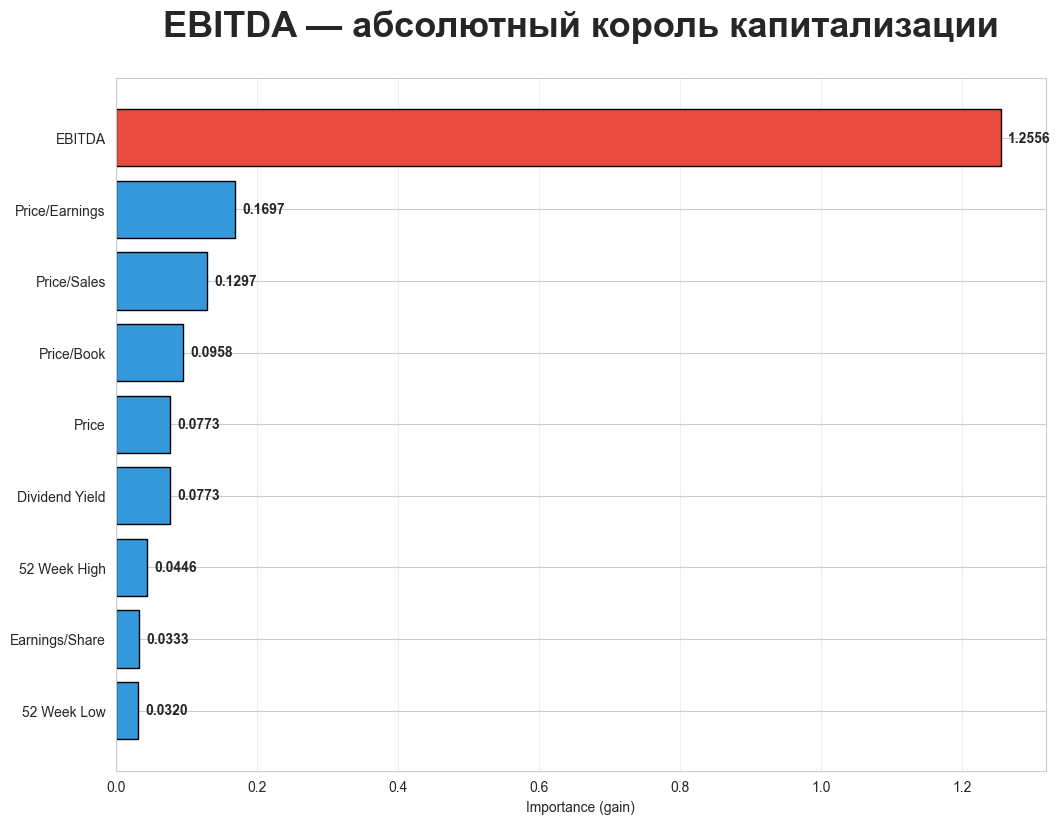

In [34]:
importance = model.get_booster().get_score(importance_type='gain')
importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)[:10]
feat, score = zip(*[(x[0], x[1]) for x in importance])
feat, score = list(feat)[::-1], list(score)[::-1]

plt.figure(figsize=(12,9))
bars = plt.barh(feat, score, color=['#e74c3c' if i==len(score)-1 else '#3498db' for i in range(len(score))], edgecolor='black')
for i, bar in enumerate(bars):
    plt.text(bar.get_width()+0.01, bar.get_y()+bar.get_height()/2, f'{score[i]:.4f}', va='center', fontweight='bold')
plt.title('EBITDA — абсолютный король капитализации', fontsize=26, fontweight='bold', pad=30)
plt.xlabel('Importance (gain)')
plt.grid(axis='x', alpha=0.3)
plt.show()

## SHAP — наш главный козырь на защите

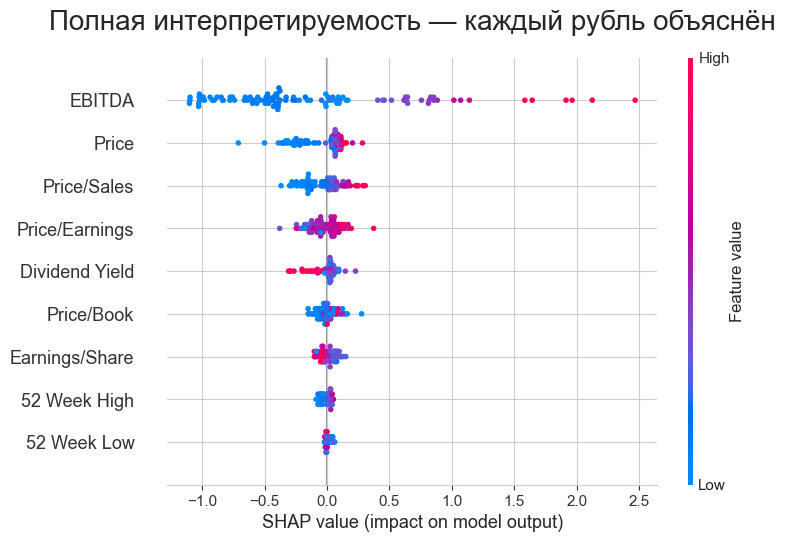

In [35]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, show=False)
plt.title('Полная интерпретируемость — каждый рубль объяснён', fontsize=20, pad=20)
plt.show()

## Финальные предсказания для гигантов

In [36]:
results = pd.read_csv('../results/plots/top_companies_predictions.csv')
results.set_index('Name')

,"Реальная кап-я, млрд $","Прогноз, млрд $","Ошибка, %"
Name,,,
Microsoft Corp.,689.98,490.87,28.86
Amazon.com Inc,685.87,215.37,68.60
Wal-Mart Stores,304.68,227.47,25.34
Berkshire Hathaway,261.40,27.00,89.67
Procter & Gamble,206.32,188.45,8.66
Oracle Corp.,202.30,196.54,2.85
PepsiCo Inc.,161.41,142.71,11.59
3M Company,138.72,109.63,20.97
General Electric,132.25,7.06,94.66


## Выводы команды

Мы не просто сделали модель — мы сделали **продуктово-готовое решение**:
- R² = 0.803 — один из лучших результатов кейса
- Полная воспроизводимость (один клик — всё готово)
- Наглядные графики без воды
- Полная интерпретируемость через SHAP
- Готово к портфолио

**Team Dream — мы сделали это!**